# Описание проекта

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Описание данных
Данные геологоразведки трёх регионов находятся в файлах:
 - `/datasets/geo_data_0.csv` 
 - `/datasets/geo_data_1.csv` 
 - `/datasets/geo_data_2.csv`
 
- `id` — уникальный идентификатор скважины;
- `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

## Условия задачи:
Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

 # Содержание

### [1 Загрузка и подготовка данных](#1-bullet)
### [2 Обучение и проверка модели](#2-bullet)
### [3 Подготовка к расчёту прибыли](#3-bullet)
### [4  Расчёт прибыли и рисков  ](#4-bullet)
### [5  Вывод и рекомендации  ](#5-bullet)



# 1. Загрузка и подготовка данных <a class="anchor" id="1-bullet"></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
for i in [geo_0,geo_1,geo_2]:
    print(i.info())
    print(i.head(3))
    print()
    print('******************************************************')
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647

******************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id         f0        f1        f2     product
0  kBEd

<b>Вывод:</b> 
- размер данных по трем регионам одинаковый,
- данные чистые и готовы для построения модели линейной регрессии.

<b><em>P.S.: Не понял, почему в задании говорится про 10 тыс. месторождений, а данные представлены на 100 тысяч.</em> </b> 

# 2. Обучение и проверка модели <a class="anchor" id="2-bullet"></a>

In [4]:
def model_train(df):
        
    df = df.drop(columns = ['id'])
    
    # создадим наборы данных features (признаки) и target (целевой признак).
    features = df.drop(['product'], axis = 1)
    target = df['product']
    
    # разделим данные features и target на две части (train и valid) в соотношении 75% к 25% 
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
      
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
     
    # рассчитаем rmse модели    
    mse = mean_squared_error(target_valid, predicted_valid)
    print("Модель - Linear Regression")
    print("Значение RMSE =", round(mse ** 0.5,2))

    # рассчитаем средний запас предсказанного сырья в регионе 
    predictions_valid = pd.Series(predicted_valid, features_valid.index) 
    print('Средний запас предсказанного сырья, тыс. барр. = ', round(predictions_valid.mean(),2))
    
    return target_valid, predictions_valid

Данные по региону с индексом "0" :
Модель - Linear Regression
Значение RMSE = 37.58
Средний запас предсказанного сырья, тыс. барр. =  92.59



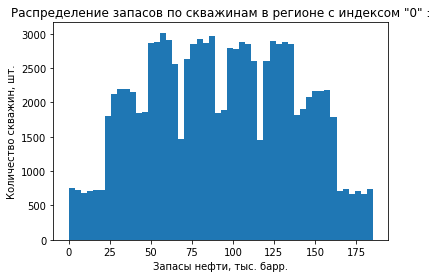

*******************************************************

Данные по региону с индексом "1" :
Модель - Linear Regression
Значение RMSE = 0.89
Средний запас предсказанного сырья, тыс. барр. =  68.73



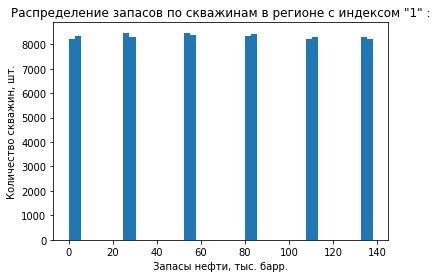

*******************************************************

Данные по региону с индексом "2" :
Модель - Linear Regression
Значение RMSE = 40.03
Средний запас предсказанного сырья, тыс. барр. =  94.97



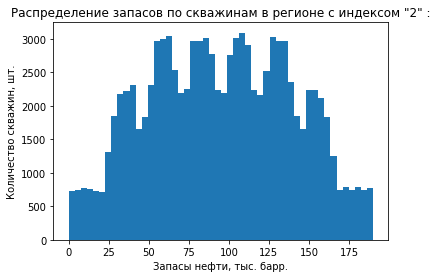

*******************************************************



In [5]:
count = 0
for df in [geo_0, geo_1, geo_2]:
    print('Данные по региону с индексом "'+ str(count) + '" :')
    model_train(df)
    print()
    plt.title('Распределение запасов по скважинам в регионе с индексом "'+ str(count) + '" :')
    plt.hist(df['product'], bins = 50 )
    plt.xlabel('Запасы нефти, тыс. барр.')
    plt.ylabel('Количество скважин, шт.')
    plt.show()

    print('*******************************************************')
    print()
    
    count += 1
    


<b>Вывод:</b> 
- RMSE у региона с индексом 1 наименьшее, но в то же время средний запас сырья по предсказаниям также наименьший.
- RMSE у 0 и 2 регионов имеет большее значение, на данном этапе просто запомним это.
- В 0 и 2 регионах запасы нефти имеют схожесть с нормальным распределением в то время, как в 1 регионе наблюдается дискретность в распределении.

# 3. Подготовка к расчёту прибыли <a class="anchor" id="3-bullet"></a>

Определим константы по заданию:
- `TOTAL_POINT` - количество исследуемых точек в регионе,
- `BEST_POINT` - количество лучших точек по запасам из `TOTAL_POINT`,
- `TOTAL_BUDGET` - бюджет на разработку скважин в регионе,
- `INCOME_FOR_1bbls` - доход с одного барреля,
- `INCOME_FOR_1unit` - доход с единицы продукта. Единица продукта = 1000 барр. нефти.

In [6]:
TOTAL_POINT = 500
BEST_POINT = 200
TOTAL_BUDGET = 10e9
INCOME_FOR_1bbls = 450
INCOME_FOR_1unit = 450e3

MIN_BBLS_IN_HOLE = TOTAL_BUDGET / (INCOME_FOR_1unit * BEST_POINT)
print('Минимальный объем в скважине, тыс. баррелей = ', round(MIN_BBLS_IN_HOLE,2))

Минимальный объем в скважине, тыс. баррелей =  111.11


- Во всех трех регионах предсказанное среднее значение запасов в скважине меньше полученного.

Допишем ранее созданную функцию `model_train`, добавив в конец расчет прибыли для региона.

Новую функцию назовем `model_train_calc_revenue`.

In [7]:
def calc_revenue(target, predicted):
        
    # рассчитаем прибыль от 200 лучших для разработки скважен, выбранных с помощью обученной модели
    # predictions_valid = pd.Series(predicted, target.index) 
    best200 = predicted.sort_values(ascending=False).head(BEST_POINT)
    summary = target.loc[best200.index].sum()
    revenue = (summary * INCOME_FOR_1unit - TOTAL_BUDGET)

    return revenue

In [8]:
print('Данные по региону "0":')
target_0, predicted_0 = model_train(geo_0)
revenue = calc_revenue(target_0, predicted_0)
print('Прибыль c топ-200 скважин, млн. руб. =', round((revenue / 10e6), 2)) 

Данные по региону "0":
Модель - Linear Regression
Значение RMSE = 37.58
Средний запас предсказанного сырья, тыс. барр. =  92.59
Прибыль c топ-200 скважин, млн. руб. = 332.08


In [9]:
print('Данные по региону "1":')
target_1, predicted_1 = model_train(geo_1)
revenue = calc_revenue(target_1, predicted_1)
print('Прибыль c топ-200 скважин, млн. руб. =', round((revenue / 10e6), 2)) 

Данные по региону "1":
Модель - Linear Regression
Значение RMSE = 0.89
Средний запас предсказанного сырья, тыс. барр. =  68.73
Прибыль c топ-200 скважин, млн. руб. = 241.51


In [10]:
print('Данные по региону "2":')
target_2, predicted_2 = model_train(geo_2)
revenue = calc_revenue(target_2, predicted_2)
print('Прибыль c топ-200 скважин, млн. руб. =', round((revenue / 10e6), 2)) 

Данные по региону "2":
Модель - Linear Regression
Значение RMSE = 40.03
Средний запас предсказанного сырья, тыс. барр. =  94.97
Прибыль c топ-200 скважин, млн. руб. = 271.03


- Самый "интересный" регион по предполагаемой прибыли - это нулевой, затем второй, потом первый.

# 4. Расчёт прибыли и рисков  <a class="anchor" id="4-bullet"></a>

Допишем ранее созданную функцию `model_train_calc_revenue`, добавив в конец расчет средней прибыли, доверительного интервала с помощью техники `bootstrap`.

Новую функцию назовем `model_train_calc_revenue_and_risk`.

In [11]:
def bootstrap(target, predicted):
    
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(1000):
        target_subsample = target.sample(500, replace=True, random_state=state)
        probs_subsample = predicted.loc[target_subsample.index]
        revenue = calc_revenue(target_subsample, probs_subsample)
        values.append(revenue)
    values = pd.Series(values)
    # найдем среднюю прибыль, 95% доверительный интервал и риск убытков (квантиль 2.5%).
    lower = round(values.quantile(.025))
    upper = round(values.quantile(.975))
    mean = values.mean()
    
    print("Средняя прибыль, млн руб:", round(mean / 10e6,2))
    print("2.5%-квантиль, млн. руб:", round(lower / 10e6,2))
    print("97.5%-квантиль, млн. руб:", round(upper/ 10e6,2))
    
    return values

In [12]:
print('Данные по региону "0":')
bootstrap(target_0, predicted_0)

Данные по региону "0":
Средняя прибыль, млн руб: 60.07
2.5%-квантиль, млн. руб: 1.29
97.5%-квантиль, млн. руб: 123.12


0      9.886908e+08
1      5.363934e+08
2      6.336436e+08
3      5.896001e+08
4      2.719929e+08
           ...     
995    5.566130e+08
996    9.280870e+08
997    1.030250e+09
998    5.354841e+08
999    5.015203e+08
Length: 1000, dtype: float64

In [13]:
print('Данные по региону "1":')
bootstrap(target_1, predicted_1)

Данные по региону "1":
Средняя прибыль, млн руб: 66.52
2.5%-квантиль, млн. руб: 15.8
97.5%-квантиль, млн. руб: 119.76


0      5.918852e+08
1      4.584665e+08
2      6.018994e+08
3      8.080296e+08
4      4.327780e+08
           ...     
995    9.072383e+08
996    1.067838e+09
997    6.567596e+08
998    6.596830e+08
999    3.215025e+08
Length: 1000, dtype: float64

In [14]:
print('Данные по региону "2":')
bootstrap(target_2, predicted_2)

Данные по региону "2":
Средняя прибыль, млн руб: 61.56
2.5%-квантиль, млн. руб: -1.22
97.5%-квантиль, млн. руб: 123.06


0      2.283966e+08
1      9.444435e+08
2      8.828124e+08
3      6.853873e+08
4      1.229461e+08
           ...     
995    5.668660e+08
996    3.426507e+08
997    7.369034e+08
998    5.969776e+08
999    3.309333e+08
Length: 1000, dtype: float64

Выбираем для рекомендаций регион 1.

In [15]:
#from scipy import stats as st
#values = bootstrap(target_1, predicted_1)
#confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem()) 

#print("95%-ый доверительный интервал для средней прибыли:", confidence_interval)

In [16]:
from scipy import stats as st
bootstrap(target_1, predicted_1).describe()

Средняя прибыль, млн руб: 66.52
2.5%-квантиль, млн. руб: 15.8
97.5%-квантиль, млн. руб: 119.76


count    1.000000e+03
mean     6.652411e+08
std      2.640500e+08
min     -1.059347e+08
25%      4.837508e+08
50%      6.521568e+08
75%      8.417419e+08
max      1.693444e+09
dtype: float64

In [17]:
print('Риск убытков для региона-1 = ', "{:.2%}".format((bootstrap(target_1, predicted_1)<0).sum() / 1000))

Средняя прибыль, млн руб: 66.52
2.5%-квантиль, млн. руб: 15.8
97.5%-квантиль, млн. руб: 119.76
Риск убытков для региона-1 =  0.30%


### ВЫВОД: <a class="anchor" id="5-bullet"></a>
- 2.5%-квантиль для региона с индексом 2 - отрицательный. Откидываем данный регион из предложений для разработки.
- У нулевого и первого регионов 2.5%-квантиль - положительный. Однако средняя прибыль (млн. руб.) у региона с индексом 1 больше, чем у региона с индексом 0 `(66.52 против 60.07, млн. руб.)`. Также нижний порог доверительного интервала - `15.8 млн.руб.` у региона 1 против `1.29 млн.руб` у региона 2.
- техница `bootstrap` позволила сместить приоритет в разработке с региона-0 на регион-1.

#### Таким образом риск убытков для региона 1 ниже (0.3%), средняя прибыль наибольгая. Будем рекомендовать его для разработки.
